Точность: 0.001
Метод дихотомии: 3.0087890625
Метод Ньютона: 3.0088043704727347

Точность: 1e-06
Метод дихотомии: 3.008833885192871
Метод Ньютона: 3.0088335669832813

Точность: 1e-09
Метод дихотомии: 3.008833567611873
Метод Ньютона: 3.0088335669832813

Точность: 0.001
Метод дихотомии: 4.6611328125
Метод Ньютона: 4.661154862825488

Точность: 1e-06
Метод дихотомии: 4.661115646362305
Метод Ньютона: 4.661115953224451

Точность: 1e-09
Метод дихотомии: 4.661115952767432
Метод Ньютона: 4.661115952710623

Точность: 0.001
Метод дихотомии: 6.81640625
Метод Ньютона: 6.816530705140282

Точность: 1e-06
Метод дихотомии: 6.816380500793457
Метод Ньютона: 6.81638004411467

Точность: 1e-09
Метод дихотомии: 6.816380030475557
Метод Ньютона: 6.816380030528726



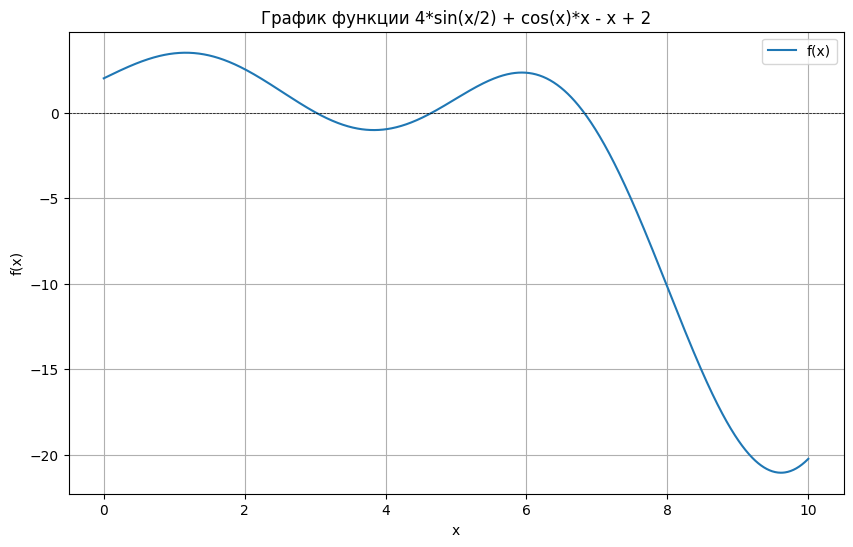

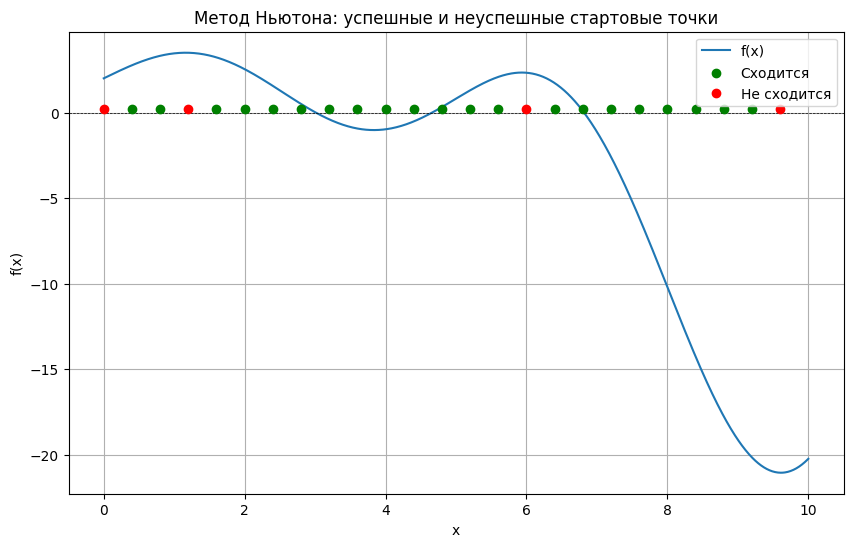

[(np.float64(0.4), np.float64(3.008833567076341)),
 (np.float64(0.8), np.float64(6.816380030528726)),
 (np.float64(1.6), np.float64(4.661115952892915)),
 (np.float64(2.0), np.float64(3.0088335673080713)),
 (np.float64(2.4000000000000004), np.float64(3.0088335673080713)),
 (np.float64(2.8000000000000003), np.float64(3.008833567308071)),
 (np.float64(3.2), np.float64(3.0088335673080713)),
 (np.float64(3.6), np.float64(3.0088335673080713)),
 (np.float64(4.0), np.float64(3.008833567212812)),
 (np.float64(4.4), np.float64(4.6611159527106265)),
 (np.float64(4.800000000000001), np.float64(4.661115952725773)),
 (np.float64(5.2), np.float64(4.661115952710623)),
 (np.float64(5.6000000000000005), np.float64(4.661115953104097)),
 (np.float64(6.4), np.float64(6.816380030528727)),
 (np.float64(6.800000000000001), np.float64(6.816380030528726)),
 (np.float64(7.2), np.float64(6.816380030530639)),
 (np.float64(7.6000000000000005), np.float64(6.816380030528726)),
 (np.float64(8.0), np.float64(6.81638003

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Определение функции и её производной
def f(x):
    return 4 * np.sin(x / 2) + np.cos(x) * x - x + 2

def df(x):
    return 2 * np.cos(x / 2) - np.sin(x) * x + np.cos(x) - 1

# Метод дихотомии
def bisection_method(a, b, eps):
    while (b - a) / 2 > eps:
        c = (a + b) / 2
        if abs(f(c)) < eps:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Метод Ньютона
def newton(x0, epsilon, max_iter=2000):
    x = x0
    for _ in range(max_iter):
        if abs(f(x)) < epsilon:
            return x  # Метод сошелся
        derivative = df(x)
        if abs(derivative) < 1e-10:  # Проверка на нулевую производную
            return None  # Метод не сошелся
        x = x - f(x) / derivative
    return None

def poisk(a, b):
    for epsilon in epsilon_values:
        root_bisection_method = bisection_method(a, b, epsilon)
        root_newton = newton((a + b) / 2, epsilon)
        print(f"Точность: {epsilon}")
        print(f"Метод дихотомии: {root_bisection_method}")
        print(f"Метод Ньютона: {root_newton}")
        print()

epsilon_values = [1e-3, 1e-6, 1e-9]

poisk(2, 4)
poisk(4, 6)
poisk(6, 8)

x_values = np.linspace(0, 10, 1000)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции 4*sin(x/2) + cos(x)*x - x + 2')
plt.legend()
plt.grid(True)
plt.show()

# Функция для анализа стартовых точек
def analyze_newton_points(a, b, epsilon, step=0.01):
    x_start_points = np.arange(a, b, step)
    successful_points = []
    failed_points = []

    for x0 in x_start_points:
        root = newton(x0, epsilon)
        if root is not None and abs(f(root)) < epsilon and 0 < root < 10:
            successful_points.append((x0, root))  # Сохраняем стартовую точку и найденный корень
        else:
            failed_points.append(x0)

    # График
    x_values = np.linspace(a, b, 1000)
    y_values = f(x_values)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    # Отображение успешных и неуспешных точек
    successful_x0 = [x0 for x0, _ in successful_points]
    successful_roots = [root for _, root in successful_points]
    plt.scatter(successful_x0, [0.2]*len(successful_x0), color='green', label='Сходится', zorder=5)
    plt.scatter(failed_points, [0.2]*len(failed_points), color='red', label='Не сходится', zorder=5)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Метод Ньютона: успешные и неуспешные стартовые точки')
    plt.legend()
    plt.grid(True)
    plt.show()

# Запуск проверки стартовых точек в диапазоне от 0 до 10
analyze_newton_points(0, 10, epsilon=1e-9, step=0.4)


Точность: 0.001
Метод дихотомии: 3.0087890625
Метод Ньютона: 3.0088043704727347

Точность: 1e-06
Метод дихотомии: 3.008833885192871
Метод Ньютона: 3.0088335669832813

Точность: 1e-09
Метод дихотомии: 3.008833567611873
Метод Ньютона: 3.0088335669832813

Точность: 0.001
Метод дихотомии: 4.6611328125
Метод Ньютона: 4.661154862825488

Точность: 1e-06
Метод дихотомии: 4.661115646362305
Метод Ньютона: 4.661115953224451

Точность: 1e-09
Метод дихотомии: 4.661115952767432
Метод Ньютона: 4.661115952710623

Точность: 0.001
Метод дихотомии: 6.81640625
Метод Ньютона: 6.816530705140282

Точность: 1e-06
Метод дихотомии: 6.816380500793457
Метод Ньютона: 6.81638004411467

Точность: 1e-09
Метод дихотомии: 6.816380030475557
Метод Ньютона: 6.816380030528726



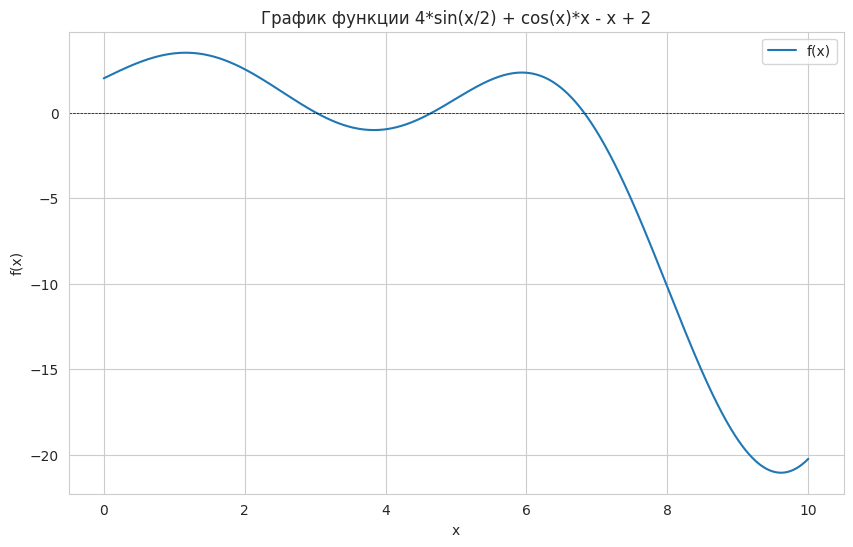

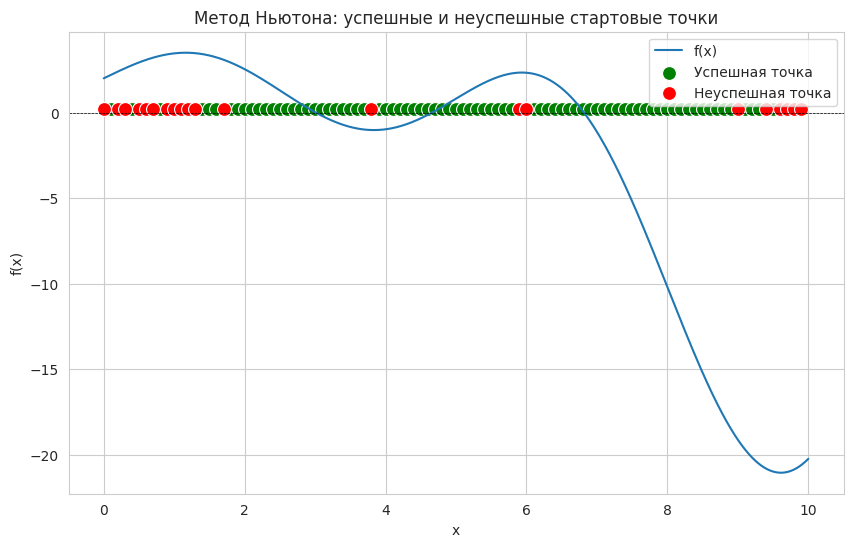

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Определение функции и её производной
def f(x):
    return 4 * np.sin(x / 2) + np.cos(x) * x - x + 2

def df(x):
    return 2 * np.cos(x / 2) - np.sin(x) * x + np.cos(x) - 1

# Метод дихотомии
def bisection_method(a, b, eps):
    while (b - a) / 2 > eps:
        c = (a + b) / 2
        if abs(f(c)) < eps:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Метод Ньютона
def newton(x0, epsilon, max_iter=2000):
    x = x0
    for _ in range(max_iter):
        if abs(f(x)) < epsilon:
            return x  # Метод сошелся
        derivative = df(x)
        if abs(derivative) < 1e-7:  # Проверка на нулевую производную
            return None  # Метод не сошелся
        x = x - f(x) / derivative
    return None

def poisk(a, b):
    for epsilon in epsilon_values:
        root_bisection_method = bisection_method(a, b, epsilon)
        root_newton = newton((a + b) / 2, epsilon)
        print(f"Точность: {epsilon}")
        print(f"Метод дихотомии: {root_bisection_method}")
        print(f"Метод Ньютона: {root_newton}")
        print()

epsilon_values = [1e-3, 1e-6, 1e-9]

poisk(2, 4)
poisk(4, 6)
poisk(6, 8)

# Построение графика функции с использованием seaborn
x_values = np.linspace(0, 10, 1000)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Устанавливаем стиль seaborn
sns.lineplot(x=x_values, y=y_values, label='f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции 4*sin(x/2) + cos(x)*x - x + 2')
plt.legend()
plt.show()

# Функция для анализа стартовых точек
def analyze_newton_points(a, b, epsilon, step=0.01):
    x_start_points = np.arange(a, b, step)
    successful_points = []
    failed_points = []

    for x0 in x_start_points:
        root = newton(x0, epsilon)
        if root is not None and abs(f(root)) < epsilon and 0 < root < 10:
            successful_points.append((x0, root))  # Сохраняем стартовую точку и найденный корень
        else:
            failed_points.append(x0)

    # График с использованием seaborn
    x_values = np.linspace(a, b, 1000)
    y_values = f(x_values)

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")  # Устанавливаем стиль seaborn
    sns.lineplot(x=x_values, y=y_values, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    # Отображение успешных и неуспешных точек
    successful_x0 = [x0 for x0, _ in successful_points]
    successful_roots = [root for _, root in successful_points]
    sns.scatterplot(x=successful_x0, y=[0.2]*len(successful_x0), color='green', label='Успешная точка', s=100)
    sns.scatterplot(x=failed_points, y=[0.2]*len(failed_points), color='red', label='Неуспешная точка', s=100)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Метод Ньютона: успешные и неуспешные стартовые точки')
    plt.legend()
    plt.show()

# Запуск проверки стартовых точек в диапазоне от 0 до 10
analyze_newton_points(0, 10, epsilon=1e-9, step=0.1)